# **Handwritten digits recognition (using Multilayer Perceptron)**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4

In this notebook, I aim to develop a comprehensive understanding of Multilayer Perceptron (MLP) models using TensorFlow for recognizing handwritten digits by making change to this [notebook](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb).
A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

## **Import Dependencies:**

Begin by importing the required libraries for developing and training the MLP model. These include TensorFlow for machine learning operations, Matplotlib for data visualization, NumPy for numerical operations, and datetime for generating log folder names.

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import datetime

## **Load the Data:**

Load the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9.

In [18]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## **Data Exploration:**

To understand the data, we display a sample of images from the dataset along with their corresponding labels.

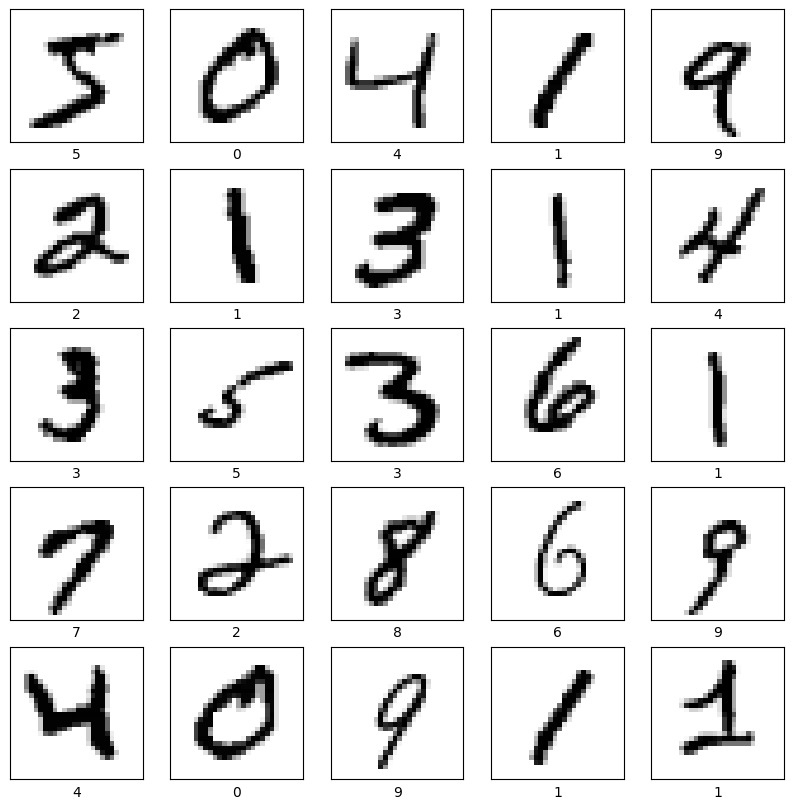

In [19]:
# Display sample images
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


## **Normalization:**

We normalize the pixel values of the images to the range [0, 1] to facilitate training.

In [20]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0


## **Model Development:**

We build a Multilayer Perceptron (MLP) model using TensorFlow with the following architecture:
1. Flatten layer that will flatten image 2D matrix into 1D vector.
2. Input Dense layer with 128 neurons and ReLU activation.
3. Hidden Dense layer with 128 neurons and ReLU activation.
4. Output Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

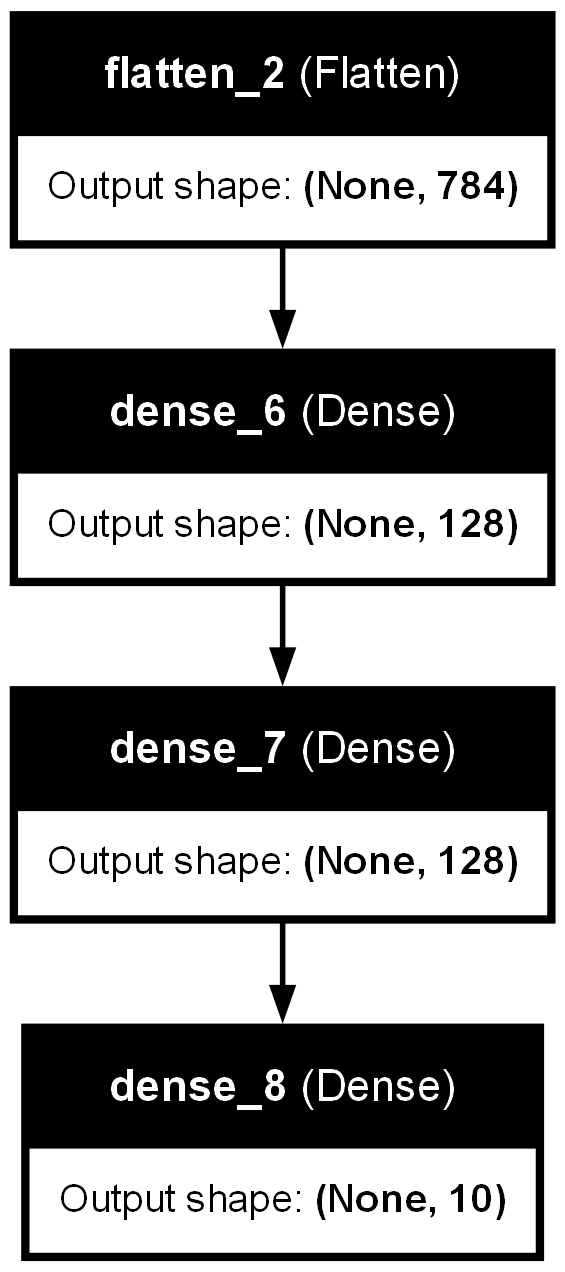

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train_normalized.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

model.summary()

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## **Model Compilation:**

We compile the model with appropriate loss function, optimizer, and evaluation metrics.

In [22]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


## **Model Training:**

We train the model on the normalized training data and evaluate its performance on the test data.

In [23]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8806 - loss: 0.4071 - val_accuracy: 0.9655 - val_loss: 0.1135
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9683 - loss: 0.1035 - val_accuracy: 0.9720 - val_loss: 0.0870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - loss: 0.0717 - val_accuracy: 0.9720 - val_loss: 0.0887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9718 - val_loss: 0.0901
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0371 - val_accuracy: 0.9760 - val_loss: 0.0914
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9709 - val_loss: 0.1025
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9783 - val_loss: 0.0863
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0230 - 

## **Training Analysis:**

We analyze the training and validation loss/accuracy trends to assess model performance and identify potential issues such as overfitting or underfitting.

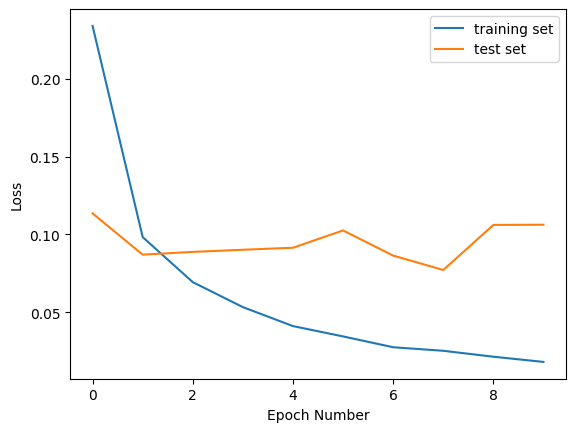

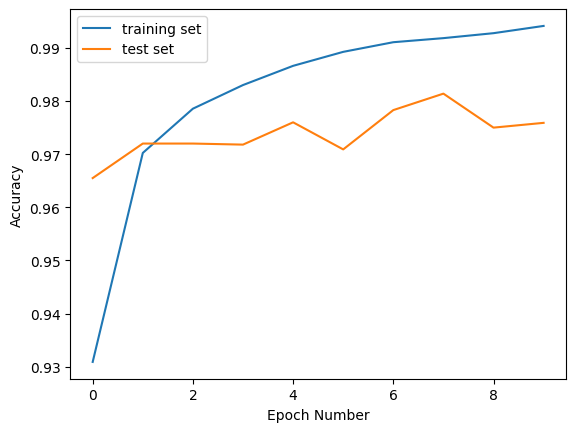

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()
plt.show()

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()
plt.show()


## **Model Evaluation:**

We evaluate the model's accuracy on both the training and test sets to assess its generalization performance.

In [25]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0158
Training loss:  0.0148163428530097
Training accuracy:  0.994700014591217
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.1308
Test loss:  0.10619208961725235
Test accuracy:  0.9758999943733215


## **Conclusion:**

In this notebook, we developed and trained a Multilayer Perceptron (MLP) model using TensorFlow for handwritten digit recognition. By analyzing the training and validation metrics, we evaluated the model's performance and assessed its generalization capability. Further experimentation and optimization may be performed to improve the model's accuracy and efficiency.